# Transformations

In [1]:
%reset -f
import numpy as np
import pywt
global i
i = np.complex(0,1)

In [2]:
M = 8;
f0 = np.random.default_rng(0).choice(M, size=M, replace=False)
#f0 = np.reshape( np.arange(M)
f0

array([7, 2, 6, 5, 3, 4, 1, 0], dtype=int64)

### dct

In [4]:
from scipy.fftpack import dct,idct

In [9]:
coeff = dct( f0 , norm = 'ortho')
coeff

array([ 9.89949494,  4.59914384, -1.80133178,  1.27624297,  0.70710678,
        2.48066311,  3.04223665,  0.25571534])

In [10]:
idct(coeff, norm = 'ortho')

array([7., 2., 6., 5., 3., 4., 1., 0.])

### fft

In [18]:
coeff = np.fft.fft( f0 )
coeff

array([28.        +0.j        , -0.94974747-7.12132034j,
        3.        -1.j        ,  8.94974747+2.87867966j,
        6.        +0.j        ,  8.94974747-2.87867966j,
        3.        +1.j        , -0.94974747+7.12132034j])

In [19]:
np.fft.ifft(coeff)

array([ 7.0000000e+00+0.j,  2.0000000e+00+0.j,  6.0000000e+00+0.j,
        5.0000000e+00+0.j,  3.0000000e+00+0.j,  4.0000000e+00+0.j,
        1.0000000e+00+0.j, -4.4408921e-16+0.j])

### real fft

In [20]:
coeff = np.fft.rfft( f0 )
coeff

array([28.        +0.j        , -0.94974747-7.12132034j,
        3.        -1.j        ,  8.94974747+2.87867966j,
        6.        +0.j        ])

In [21]:
np.fft.irfft(coeff)

array([ 7.0000000e+00,  2.0000000e+00,  6.0000000e+00,  5.0000000e+00,
        3.0000000e+00,  4.0000000e+00,  1.0000000e+00, -4.4408921e-16])

### hermitian fft

In [22]:
coeff = np.fft.hfft( f0 )
coeff

array([49.        , 12.18598068, -8.12498175,  1.34720719, -2.37866613,
        8.46681213, 10.50364789,  5.        , 10.50364789,  8.46681213,
       -2.37866613,  1.34720719, -8.12498175, 12.18598068])

In [23]:
np.fft.ihfft(coeff)

array([7.+0.00000000e+00j, 2.-6.34413157e-17j, 6.-6.34413157e-17j,
       5.+3.17206578e-17j, 3.+3.17206578e-17j, 4.-6.34413157e-17j,
       1.-6.34413157e-17j, 0.+0.00000000e+00j])

### wavelets single-level

In [24]:
coeff = pywt.dwt( f0 , 'db2', mode='periodization')
coeff

(array([5.52744473, 6.71751442, 5.69152943, 1.8625013 ]),
 array([-2.79375195,  1.13001053,  1.54362308, -4.12252235]))

In [25]:
pywt.idwt(coeff[0], coeff[1], 'db2', mode='periodization')

array([7., 2., 6., 5., 3., 4., 1., 0.])

### wavelets multi-level multi-array

In [26]:
coeff = pywt.wavedec( f0 , 'db2', mode='periodization', level=2)
coeff

[array([6.29246825, 7.70753175]),
 array([ 1.39054446, -3.25656986]),
 array([-2.79375195,  1.13001053,  1.54362308, -4.12252235])]

In [27]:
pywt.waverec(coeff, 'db2', mode='periodization')

array([7.0000000e+00, 2.0000000e+00, 6.0000000e+00, 5.0000000e+00,
       3.0000000e+00, 4.0000000e+00, 1.0000000e+00, 4.4408921e-16])

### wavelets multi-level single-array

In [30]:
coeff = pywt.wavedec( f0 , 'db2', mode='periodization', level=2)
arr, a0_shape = pywt.coeffs_to_array(coeff)
del coeff
arr , a0_shape

(array([ 6.29246825,  7.70753175,  1.39054446, -3.25656986, -2.79375195,
         1.13001053,  1.54362308, -4.12252235]),
 [(slice(None, 2, None),),
  {'d': (slice(2, 4, None),)},
  {'d': (slice(4, 8, None),)}])

In [31]:
coeff = pywt.array_to_coeffs(arr, a0_shape, output_format='wavedec')
pywt.waverec(coeff, 'db2', mode='periodization')

array([7.0000000e+00, 2.0000000e+00, 6.0000000e+00, 5.0000000e+00,
       3.0000000e+00, 4.0000000e+00, 1.0000000e+00, 4.4408921e-16])

### list wavelets

In [261]:
pywt.families(short=True)

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [74]:
pywt.wavelist(family='db', kind='all')

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

# plot wavelets

In [41]:
from math import ceil
import matplotlib.pyplot as plt

haar


c:\program files\python38\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


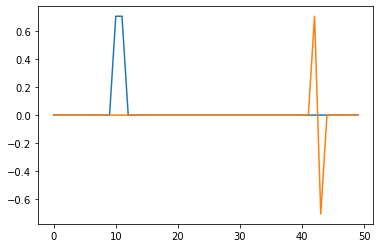

db38


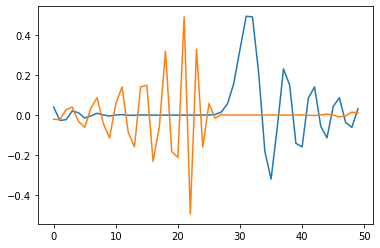

sym20


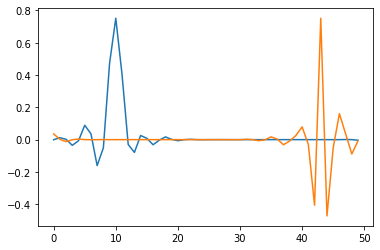

coif17


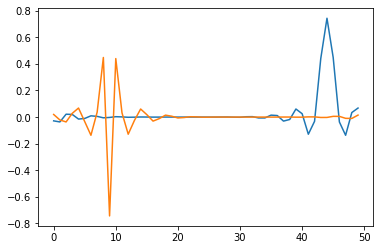

bior6.8


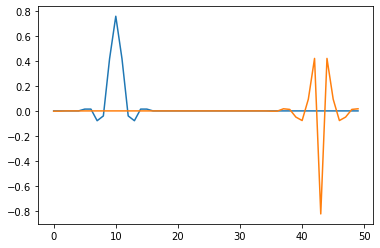

rbio6.8


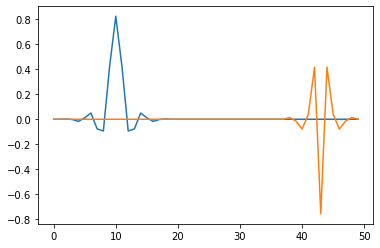

In [94]:
M=50
f0 = np.zeros(M)

coeff = pywt.wavedec( f0 , 'db38', mode='periodization', level=1)
arr, a0_shape = pywt.coeffs_to_array(coeff)

for wv in ['haar', 'db38', 'sym20', 'coif17', 'bior6.8', 'rbio6.8']:
    
    print(wv)

    arr = np.zeros(M)
    arr[ceil(M/4)-8] = 1

    coeff = pywt.array_to_coeffs(arr, a0_shape, output_format='wavedec')
    f = pywt.waverec(coeff, wv, mode='periodization')
    plt.plot(f)

    arr = np.zeros(M)
    arr[ceil(M*3/4)+8] = 1

    coeff = pywt.array_to_coeffs(arr, a0_shape, output_format='wavedec')
    f = pywt.waverec(coeff, wv, mode='periodization')
    plt.plot(f)
    
    plt.show()

### compressed fft 1D

In [15]:
def compress_real_fft_coeff_1D(fft_coeff,**kwargs):
    N,M = np.shape(fft_coeff)
    if 'axis' in kwargs:
        axis = kwargs['axis']
    elif N==1:
        axis = 0
    elif M==1:
        axis = 1
    else: #revert to default
        axis = 0
    
    compressed = np.zeros((N,M),dtype=float)
    
    if axis==0:
        N2 = int(np.ceil(N/2))
        N_even = (np.mod(N,2)==0)
        compressed[0,:] = np.real(fft_coeff[0,:])
        compressed[1:N2+N_even,:] = np.real(fft_coeff[1:N2+N_even,:])
        compressed[N2+N_even:N,:] = np.imag(fft_coeff[N2+N_even:N,:])
    else:
        M2 = int(np.ceil(M/2))
        M_even = (np.mod(M,2)==0)
        compressed[:,0] = np.real(fft_coeff[:,0])
        compressed[:,1:M2+M_even] = np.real(fft_coeff[:,1:M2+M_even])
        compressed[:,M2+M_even:M] = np.imag(fft_coeff[:,M2+M_even:M])
    
    return np.real( compressed )

def decompress_real_fft_coeff_1D(compressed,**kwargs):
    N,M = np.shape(compressed)
    if 'axis' in kwargs:
        axis = kwargs['axis']
    elif N==1:
        axis = 0
    elif M==1:
        axis = 1
    else: #revert to default
        axis = 0
    
    decompressed = np.zeros((N,M),dtype=complex)
    
    M2 = int(np.ceil(M/2))
    M_even = (np.mod(M,2)==0)
    N2 = int(np.ceil(N/2))
    N_even = (np.mod(N,2)==0)
    
    if axis==0:
        decompressed[0,:] = np.real(compressed[0,:])
        decompressed[1:N2+N_even,:] = compressed[1:N2+N_even,:]
        decompressed[1:N2,:] += -i*compressed[N-1:N2+N_even-1:-1,:]
        decompressed[N2+N_even:N,:] = compressed[N2-1:0:-1,:]
        decompressed[N2+N_even:N,:] += i*compressed[N2+N_even:N,:]
        
    else:
        decompressed[:,0] = np.real(compressed[:,0])
        decompressed[:,1:M2+M_even] = compressed[:,1:M2+M_even]
        decompressed[:,1:M2] += -i*compressed[:,M-1:M2+M_even-1:-1]
        decompressed[:,M2+M_even:M] = compressed[:,M2-1:0:-1]
        decompressed[:,M2+M_even:M] += i*compressed[:,M2+M_even:M]

    return decompressed

In [16]:
#usage
M = 3; N = 3;
f0 = np.reshape( np.random.default_rng(0).choice(M*N, size=M*N, replace=False) , [N,M])
#f0 = np.reshape( np.arange(M*N) , [N,M])
x = compress_real_fft_coeff_1D( np.fft.fft( f0 ,axis=0) ,axis=0)
f = np.fft.ifft( decompress_real_fft_coeff_1D( x ,axis=0) ,axis=0)
np.round(f0,3) , np.round(x,3) , np.round(np.real(f),3) , np.round(np.sum(np.abs(f0-f)),3)

(array([[0, 8, 3],
        [7, 2, 5],
        [4, 6, 1]], dtype=int64),
 array([[11.   , 16.   ,  9.   ],
        [-5.5  ,  4.   ,  0.   ],
        [ 2.598, -3.464,  3.464]]),
 array([[0., 8., 3.],
        [7., 2., 5.],
        [4., 6., 1.]]),
 0.0)

### compressed fft 2D

In [266]:

def compress_real_fft_coeff_2D(fft2_coeff):
    N,M = np.shape(fft2_coeff)
    N2 = int(np.ceil(N/2))
    M2 = int(np.ceil(M/2))
    N_even = (np.mod(N,2)==0)
    M_even = (np.mod(M,2)==0)

    compressed = np.zeros((N,M),dtype=float)

    compressed[0,0:(M2+M_even)] = np.real(fft2_coeff[0,0:(M2+M_even)])
    compressed[0,(M2+M_even):M] = np.imag(fft2_coeff[0,(M2+M_even):M])
    compressed[1:N2,:] = np.real(fft2_coeff[1:N2,:])
    if N_even == 1:
        compressed[N2+N_even-1,0:(M2+N_even*M_even)] = np.real(fft2_coeff[N2+N_even-1,0:(M2+N_even*M_even)])
        compressed[N2+N_even-1,(M2+N_even*M_even):M] = np.imag(fft2_coeff[N2+N_even-1,(M2+N_even*M_even):M])

    compressed[(N2+N_even):N,:] = np.imag(fft2_coeff[(N2+N_even):N,:])
    return np.real( compressed )

def decompress_real_fft_coeff_2D(compressed):
    N,M = np.shape(compressed)
    N2 = int(np.ceil(N/2))
    M2 = int(np.ceil(M/2))
    N_even = (np.mod(N,2)==0)
    M_even = (np.mod(M,2)==0)

    decompressed = np.zeros((N,M),dtype=complex)

    ###decompressed[0,:] = np.concatenate(( compressed[0,0:(M2+M_even)], compressed[0,M2-1:0:-1] )) + i* np.concatenate(( [0] , -1*compressed[0,M-1:(M2+M_even-1):-1] , [0] , compressed[0,(M2+M_even):M] ))
    decompressed[0,0:(M2+M_even)] = compressed[0,0:(M2+M_even)]
    decompressed[0,(M2+M_even):M] = compressed[0,M2-1:0:-1]
    decompressed[0,0] += i*0
    decompressed[0,1:(M2)] += -i*compressed[0,M-1:(M2+M_even-1):-1]
    decompressed[0,M2] += i*0
    decompressed[0,(M2+M_even):M] += i*compressed[0,(M2+M_even):M]
    ###decompressed[1:,0] = np.concatenate(( compressed[1:(N2+N_even),0].T, compressed[N2-1:0:-1,0].T )) + i* np.concatenate(( -1*compressed[N-1:(N2+N_even-1):-1,0].T , [0] , compressed[(N2+N_even):N,0].T ))
    decompressed[1:(N2+N_even),0] = compressed[1:(N2+N_even),0]
    decompressed[(N2+N_even):N,0] = compressed[N2-1:0:-1,0]
    decompressed[1:(N2),0] += -i*compressed[N-1:(N2+N_even-1):-1,0]
    decompressed[N2,0] += i*0
    decompressed[(N2+N_even):N,0] += i*compressed[(N2+N_even):N,0]
    ###decompressed[N2+N_even-1,1:] = np.concatenate(( compressed[N2+N_even-1,1:(M2+M_even)], compressed[N2+N_even-1,M2-1:0:-1] )) + i* np.concatenate(( -1*compressed[N2+N_even-1,M-1:(M2+M_even-1):-1] , [0] , compressed[N2+N_even-1,(M2+M_even):M] ))
    decompressed[N2+N_even-1,1:(M2+M_even)] = compressed[N2+N_even-1,1:(M2+M_even)]
    decompressed[N2+N_even-1,(M2+M_even):M] = compressed[N2+N_even-1,M2-1:0:-1]
    decompressed[N2+N_even-1,1:(M2+M_even)] += -i*compressed[N2+N_even-1,M-1:(M2+M_even-1):-1]
    decompressed[N2+N_even-1,1:M2] += i*0
    decompressed[N2+N_even-1,(M2+M_even):M] += i*compressed[N2+N_even-1,(M2+M_even):M]

    decompressed[1:N2,1:] = compressed[1:N2,1:] - i*np.rot90(compressed[(N2+N_even):,1:],2)
    decompressed[(N2+N_even):,1:] = np.rot90(compressed[1:N2,1:],2) + i*compressed[(N2+N_even):,1:]
    return decompressed


In [268]:
#usage
M = 3; N = 3;
f0 = np.reshape( np.random.default_rng(0).choice(M*N, size=M*N, replace=False) , [N,M])
#f0 = np.reshape( np.arange(M*N) , [N,M])
x = compress_real_fft_coeff_2D( np.fft.fft2( f0 ) )
f = np.fft.ifft2( decompress_real_fft_coeff_2D( x ) )
np.round(f0,3) , np.round(x,3) , np.round(np.real(f),3) , np.round(np.sum(np.abs(f0-f)),3)

(array([[0, 8, 3],
        [7, 2, 5],
        [4, 6, 1]], dtype=int64),
 array([[ 36.   ,  -1.5  ,   6.062],
        [ -1.5  ,  -1.5  , -13.5  ],
        [  2.598,  -0.866,   6.062]]),
 array([[0., 8., 3.],
        [7., 2., 5.],
        [4., 6., 1.]]),
 0.0)